# Classifying handwritten digits using the SVD

## Load data from the MNIST data set

In [4]:
#using Pkg
#Pkg.add("Flux")

In [3]:
using Flux
using Flux.Data.MNIST

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1186


In [5]:
labels = MNIST.labels();
images = MNIST.images(); 

In [8]:
#using Pkg
#Pkg.add("ImageShow")

using ImageShow

Let's see what the images look like:

In [11]:
#using Pkg
Pkg.add("ImageMagick")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [6218d12a] + ImageMagick v0.7.1
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [6218d12a] + ImageMagick v0.7.1


┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1186


,,,,

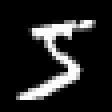
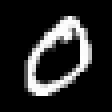
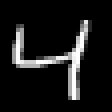
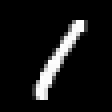
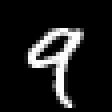

In [12]:
images[1:5]

,,,,
,,,,
,,,,
,,,,
,,,,

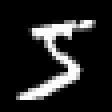
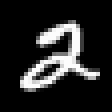
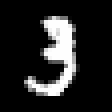
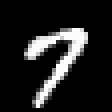
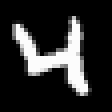
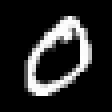
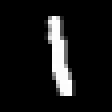
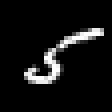
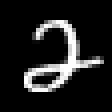
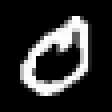
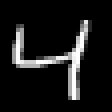
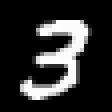
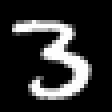
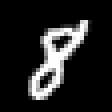
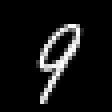
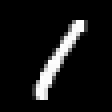
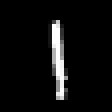
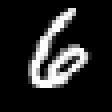
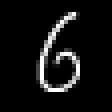
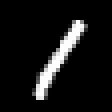
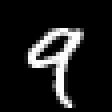
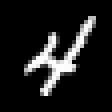
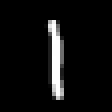
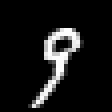
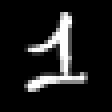

In [13]:
reshape(images[1:25], 5, 5)

In [14]:
#using Pkg
#Pkg.add("Interact")
using Interact

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1186


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c3bc34a010e41a2e08938d332e1835bc1894ae00-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c3bc34a010e41a2e08938d332e1835bc1894ae00-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

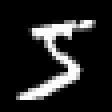

In [15]:
images[1]

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
30000), Observable{Int64} with 2 listeners. Value:
30000, Scope("knockout-component-3eb8811b-75d4-4c9e-a002-445ceb208401", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>60000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
30000, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/edelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/edelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/edelman/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/edelman/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/edelman/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":30000}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-3eb8811b-75d4-4c9e-a002-445ceb208401\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-3eb8811b-75d4-4c9e-a002-445ceb208401\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n   
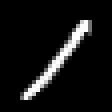
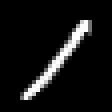

In [16]:
@manipulate for i in eachindex(images)
    hbox(images[i], hskip(1em), string("label: ", labels[i]))
end

## An image is just data

In [18]:
a = vec(images[2][10, :])

In [21]:
b = round.(Int, 256*images[2][10, i].val for i in 1:28);

In [22]:
a[1]

In [23]:
b[1]

0

In [24]:
@manipulate for j in 1:28
    a = vec(images[2][j, :])
    b = round.(Int, 256*images[2][j, i].val for i in 1:28);
    hbox([vbox(a[i], string(" ", b[i], " " )) for i in 1:28])
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:j=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
14), Observable{Int64} with 2 listeners. Value:
14, Scope("knockout-component-3684aba8-2898-4570-b66b-b74ef0723c1a", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["j"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>28,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
14, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/edelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/edelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/edelman/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/edelman/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/edelman/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":14}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-3684aba8-2898-4570-b66b-b74ef0723c1a\",\"id\":\"ob_07\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-3684aba8-2898-4570-b66b-b74ef0723c1a\",\"id\":\"ob_06\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.mo

In [25]:
@manipulate for j in 1:28
    a = vec(images[2][j, :])
    b = round.(Int, 256*images[2][j, i].val for i in 1:28);
    
    hbox([vbox(a[i], string(b[i])) for i in 1:28])
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:j=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
14), Observable{Int64} with 2 listeners. Value:
14, Scope("knockout-component-55630ee4-4138-4910-8fe7-36d753d2b255", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["j"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>28,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
14, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/edelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/edelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/edelman/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/edelman/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/edelman/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":14}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-55630ee4-4138-4910-8fe7-36d753d2b255\",\"id\":\"ob_12\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-55630ee4-4138-4910-8fe7-36d753d2b255\",\"id\":\"ob_11\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.mo

In [26]:
@manipulate for start in 1:28^2 - 28
    a = vec(images[2][start:start+27])
    b = round.(Int, 256*images[2][i].val for i in start:start+27);
    
    hbox([vbox(a[i], hbox(hskip(0.5em), string(b[i]))) for i in 1:28])
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:start=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
378), Observable{Int64} with 2 listeners. Value:
378, Scope("knockout-component-bb3940e4-e744-44bd-802e-a68c025a87fe", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["start"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>756,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
378, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/edelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/edelman/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/edelman/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/edelman/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/edelman/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":378}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-bb3940e4-e744-44bd-802e-a68c025a87fe\",\"id\":\"ob_17\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-bb3940e4-e744-44bd-802e-a68c025a87fe\",\"id\":\"ob_16\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }

## Collect all the data into a matrix

Let's collect all the data into a matrix. We take 50000 images as our training set:

In [27]:
training_size = 50000

training_images = images[1:training_size]
training_labels = labels[1:training_size];

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

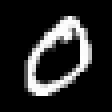
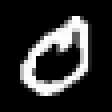
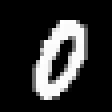
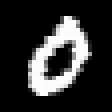
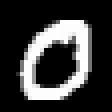
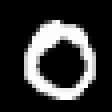
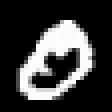
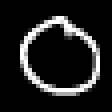
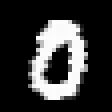
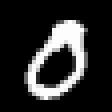
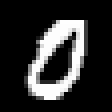
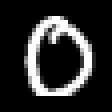
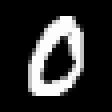
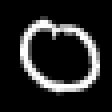
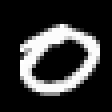
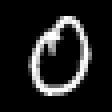
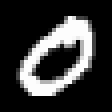
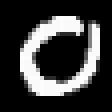
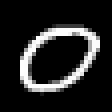
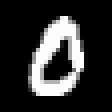
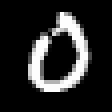
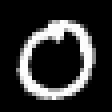
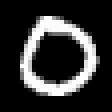
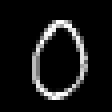
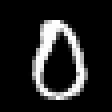
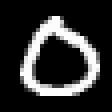
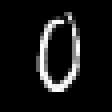
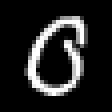
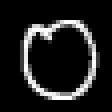
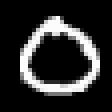
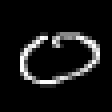
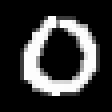
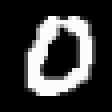
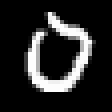
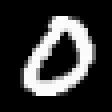
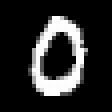
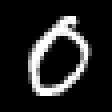
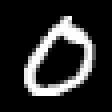
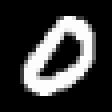
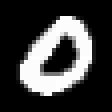
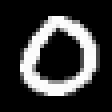
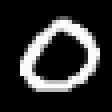
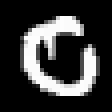
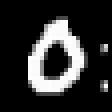
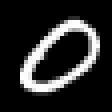
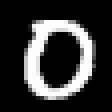
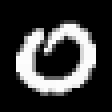
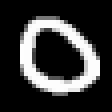
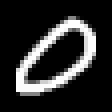
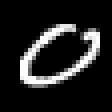
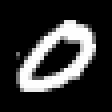
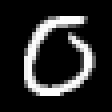
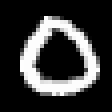
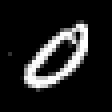
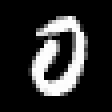
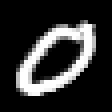
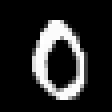
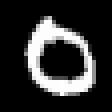
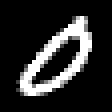
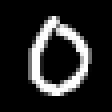
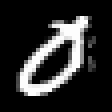
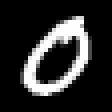
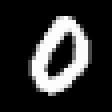
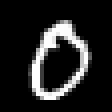
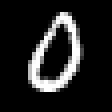
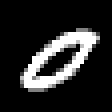
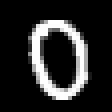
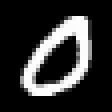
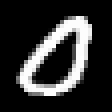
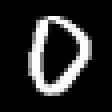
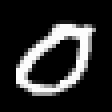
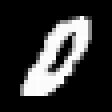
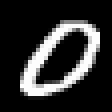
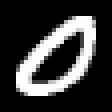
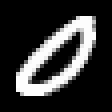
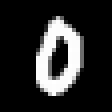
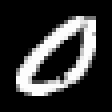
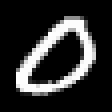
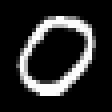
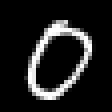
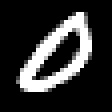
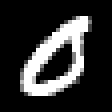
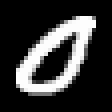
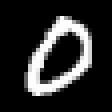
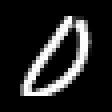
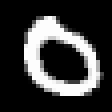
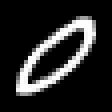
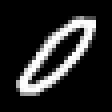
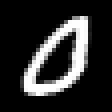
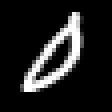
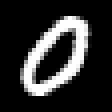
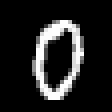
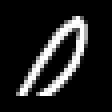
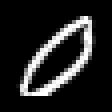
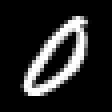
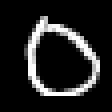
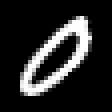
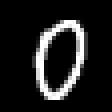
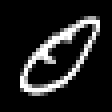
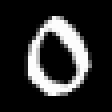

In [28]:
images_0 = training_images[training_labels .== 0];
images_0[1:100]

In [29]:
length(images_0)

4932

In [30]:
function vectorize(image) 
    return round.(Int, 256*image[i].val for i in eachindex(image))
end

vectorize (generic function with 1 method)

In [31]:
show(vectorize(images[2]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76, 85, 85, 85, 86, 85, 85, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 57, 199, 247, 253, 253, 253, 254, 253, 253, 200, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 179, 253, 254, 253, 231, 224, 146, 226, 250, 253, 253, 129, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 166, 253, 253, 191, 112, 25, 0, 0, 0, 147, 253, 253, 253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 239, 254, 241, 63, 0, 0, 0, 0, 0, 0, 48, 230, 254, 254,

In [32]:
reduce(hcat, vec.(training_images));

In [33]:
big_image_matrix = reduce(hcat, vectorize.(training_images));

In [34]:
size(big_image_matrix)

(784, 50000)

In [35]:
big_image_matrix

784×50000 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0

In [36]:
single_digits = [ big_image_matrix[:, training_labels .== i] for i in 0:9 ]

10-element Array{Array{Int64,2},1}:
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

In [37]:
using LinearAlgebra

In [39]:
Z = svd.(single_digits);

In [41]:
Us = first.(Z)

10-element Array{Array{Float64,2},1}:
 [1.11022e-16 5.55112e-17 … -0.233222 -0.655022; 0.0 1.66533e-16 … -0.445464 -0.144503; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]  
 [3.33067e-16 4.44089e-16 … 0.0380739 0.512677; 0.0 -1.11022e-16 … 0.18879 0.536151; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]     
 [2.22045e-16 -5.55112e-17 … 0.231308 -0.368113; 0.0 -2.77556e-17 … -0.051365 -0.2811; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]   
 [0.0 5.55112e-17 … 0.311321 0.206791; 0.0 -1.11022e-16 … -0.0529915 -0.451834; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]          
 [3.33067e-16 -5.55112e-17 … -0.370282 -0.220779; 0.0 -2.08167e-16 … -0.309858 -0.237422; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 7.28584e-17 … -0.139411 0.0608648; 0.0 1.73472e-18 … 0.0828636 0.0340397; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]          
 [1.11022e-16 3.81639e-17 … -0.434975 0.0250785; 0.0 -1.249e-16 … 0.4825 0.548757; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]       
 [-2.22045e-16 5.55112e-17 … -0.074469

In [50]:
Σs = (x->x.S).(Z)

10-element Array{Array{Float64,1},1}:
 [1.53412e5, 53182.6, 43389.3, 33227.4, 26282.7, 23954.3, 22724.6, 21385.5, 19505.4, 19000.8  …  1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 7.04459e-12, 2.49672e-12]
 [1.06664e5, 54157.8, 33575.9, 21277.0, 18580.6, 15995.6, 14640.0, 13384.0, 12947.8, 10979.1  …  8.3438e-12, 8.3438e-12, 8.3438e-12, 8.3438e-12, 8.3438e-12, 8.3438e-12, 8.3438e-12, 8.3438e-12, 3.85173e-12, 1.7106e-12]         
 [1.31347e5, 44030.7, 35462.6, 28960.6, 28889.2, 26230.1, 24075.9, 22452.5, 20703.0, 20124.7  …  9.76209e-12, 9.76209e-12, 9.76209e-12, 9.76209e-12, 9.76209e-12, 9.76209e-12, 9.66035e-12, 5.92533e-12, 3.13578e-12, 1.38419e-12]
 [1.33337e5, 43260.5, 36740.9, 29920.8, 27714.7, 23127.7, 21122.8, 20459.5, 19744.1, 18667.3  …  1.11891e-11, 1.11891e-11, 1.11891e-11, 1.11891e-11, 1.11891e-11, 1.11891e-11, 1.11891e-11, 1.11891e-11, 4.3851e-12, 1.73169e-12] 
 [1.16251e5, 39430.8, 34972.0, 28818.6, 26966.4, 24743

In [51]:
Σ = first(Σs)

784-element Array{Float64,1}:
 153412.34325748606         
  53182.57522622032         
  43389.29407762682         
  33227.355280849304        
  26282.747653212456        
  23954.273626346796        
  22724.608705719555        
  21385.478004500383        
  19505.379697273984        
  19000.76178667435         
  17999.110034019035        
  16639.474979844537        
  16365.94766476833         
      ⋮                     
      1.3243514938512722e-11
      1.3243514938512722e-11
      1.3243514938512722e-11
      1.3243514938512722e-11
      1.3243514938512722e-11
      1.3243514938512722e-11
      1.3243514938512722e-11
      1.3243514938512722e-11
      1.3243514938512722e-11
      1.3243514938512722e-11
      7.044586863316572e-12 
      2.496718909340919e-12 

In [52]:
using Plots

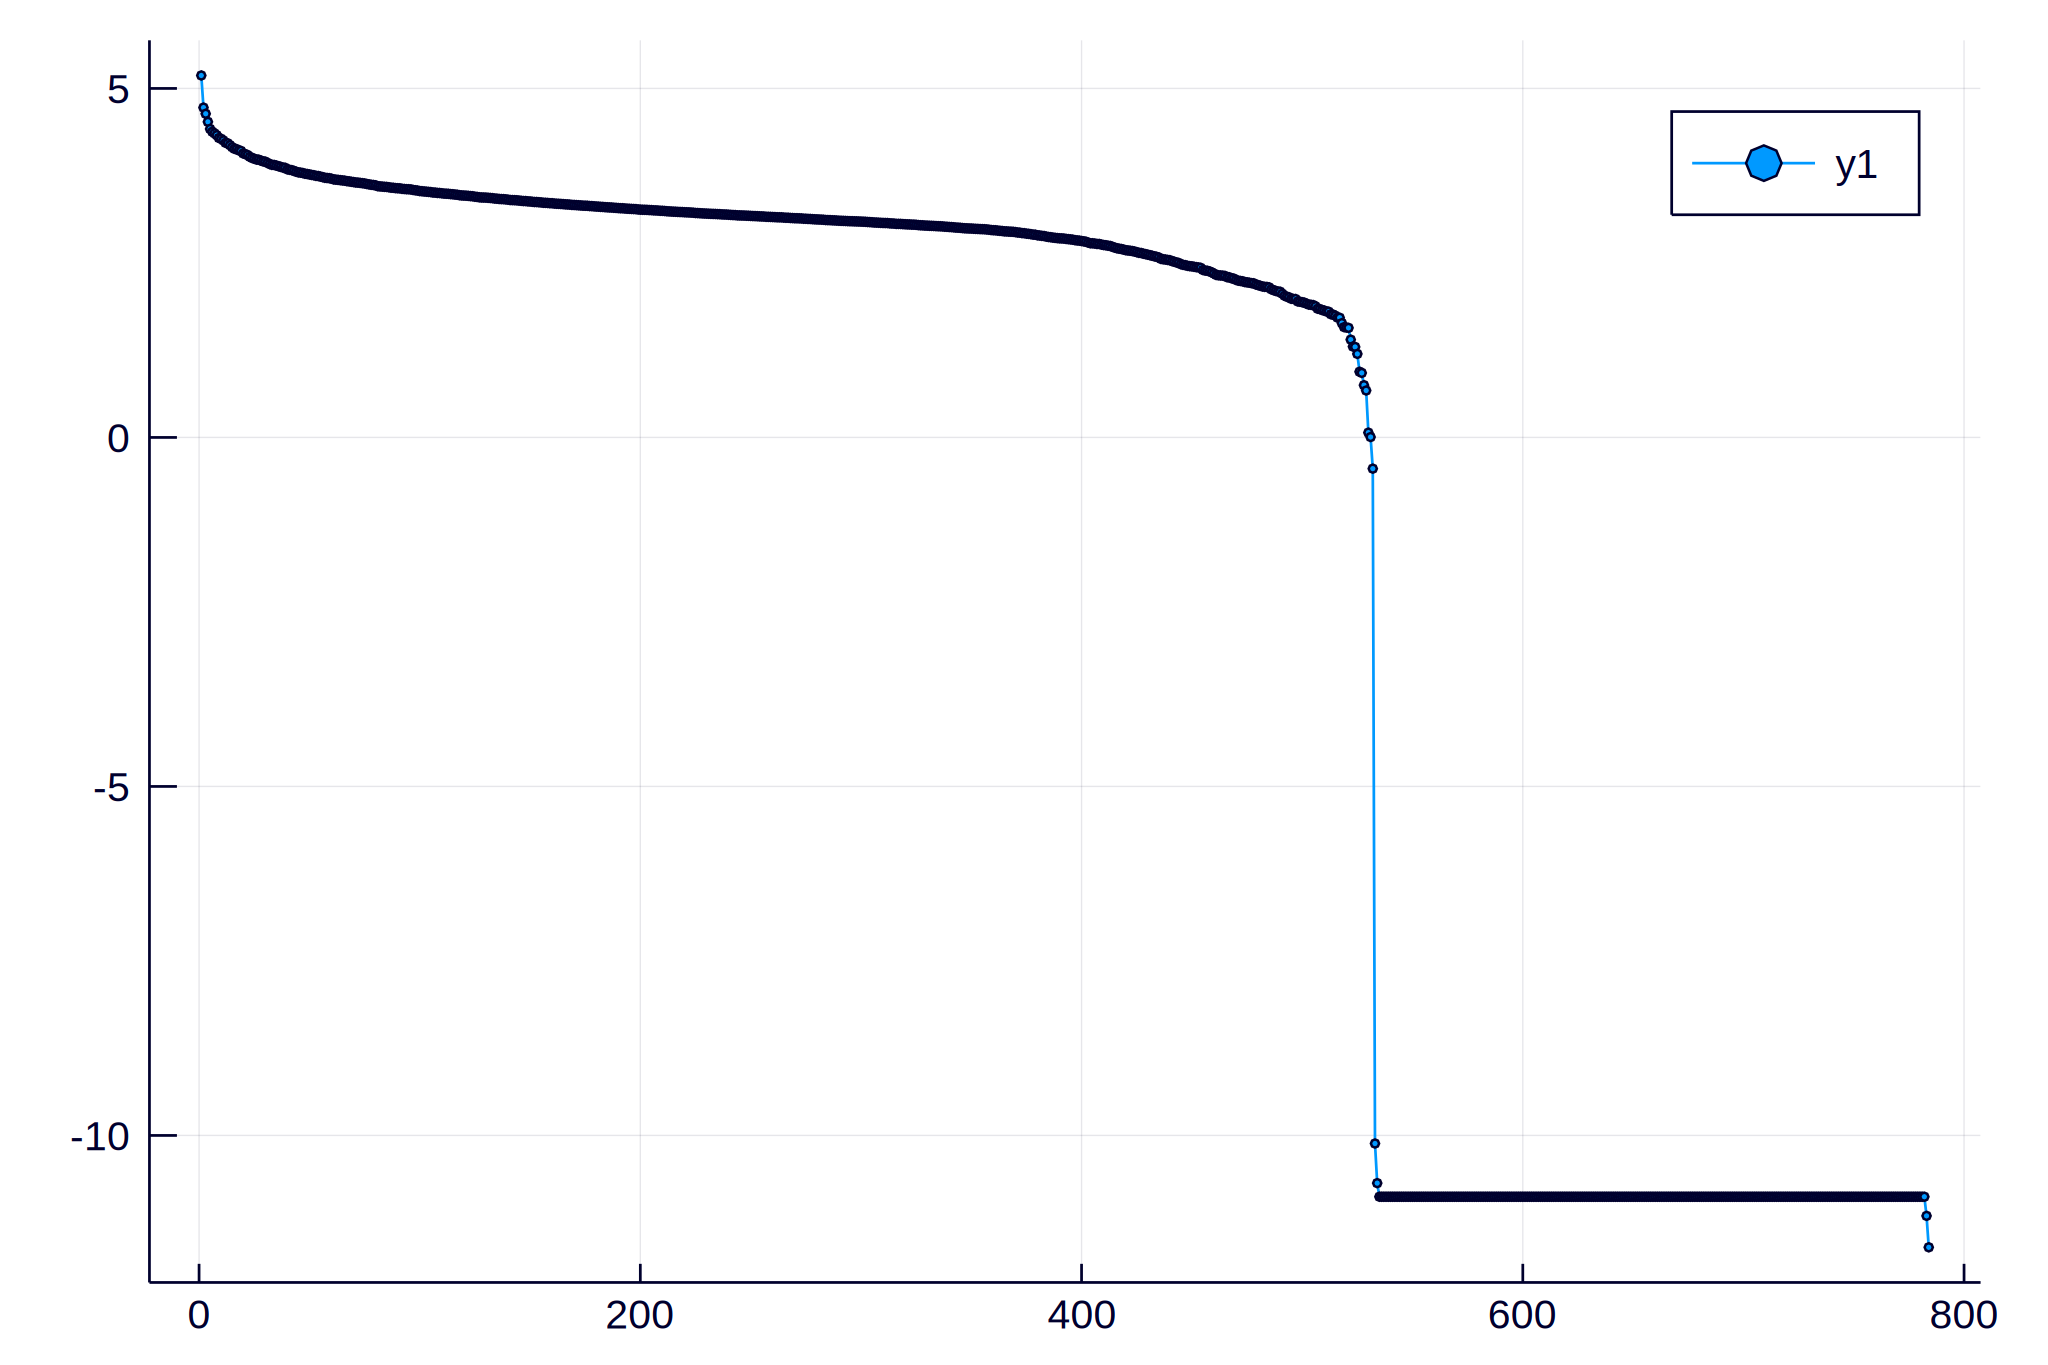

In [53]:
plot(log10.(Σ), m=:o, ms=1)

In [54]:
using Statistics

In [56]:
Gray.(reshape(mean(single_digital, dims=2), 28, 28))

DimensionMismatch: DimensionMismatch("dimensions must match")

In [ ]:
S

In [ ]:
U[:, 1]

In [ ]:
norm(U[:, 1])

In [ ]:
show(U[:, 1])

In [ ]:
image = abs.(log10.(abs.(reshape(normalize(U[:, 1]), 28, 28))))

In [ ]:
image[image .== Inf] .= 0.0

In [ ]:
@manipulate for θ in 0.0:0.01:1.0 
    image = abs.(U[:, 1]) .> θ
    Gray.(reshape(image, 28, 28))
end

In [ ]:
image = abs.(U[:, 1])
m = maximum(image)
image = image ./ m

In [ ]:
Us

In [ ]:
Us[1][:,1]

In [ ]:
function normalize_image(image)
    image2 = abs.(image)
    m = maximum(image2)
    image2 = image2 ./ m
    return Gray.(reshape(image2, 28, 28))
end

In [ ]:
@manipulate for digit in 0:9, which_sing_vec in 1:10

    image = Us[digit+1][:,which_sing_vec]    
   
    normalize_image(image)
end

In [ ]:
normalize_image(mean(single_digits[1], dims=2))

## Comparing digit predictions with labels


In [ ]:
image = images[training_size + 1]

In [ ]:
M = [U[:,1:3] for U in Us]  # first n sing vecs for each digit

In [ ]:
first_sing_vecs = reduce(hcat, [U[:,1] for U in Us])

In [ ]:
my_softmax(v) = exp.(v) / sum(exp.(v))

In [ ]:
v = abs.(first_sing_vecs' * vec(Float64.(image)))

my_softmax(v)

In [ ]:
M = [U[:, 1:1] for U in Us]  # first n sing vecs for each digit

my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))

In [ ]:
M = [U[:, 1:2] for U in Us]  # first n sing vecs for each digit

my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))

In [ ]:
M = [U[:, 1:3] for U in Us]  # first n sing vecs for each digit

my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))

In [ ]:
M = [U[:, 1:10] for U in Us]  # first n sing vecs for each digit

my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))

In [ ]:
@manipulate for num_sing_vecs in 1:784

    M = [U[:, 1:num_sing_vecs] for U in Us]  # first n sing vecs for each digit

    v = my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))
    
    hbox(v, plot(0:9, v, m=:o), findmax(v))
    
end

In [ ]:
data = []

for num_sing_vecs in 1:15

    M = [U[:, 1:num_sing_vecs] for U in Us]  # first n sing vecs for each digit

    v = my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))
    
    push!(data, v[4])
end

plot(data, m=:o)
scatter!([argmax(data)], [maximum(data)])
    

In [ ]:
argmax(data)

In [ ]:
softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))

In [ ]:
vec(images[1])

In [ ]:
# classify all images:
k = 1
predictions = classify_image(tst, trn, k)

fig1 = figure(figsize=(2,2))

set_cmap("gray_r")

#im1 = matshow(vec2mat(tst[:,1]), fignum=0)
im1 = matshow(reshape(tst[:,1], 16, 16)', fignum=0)

axis("off") 
ttl = text(0,-1,"Predicted: ",size=16)

n, T = size(tst)

In [ ]:
length(predictions)

In [ ]:
length(incorrect) / length(predictions)

In [ ]:
incorrect = find(predictions .!= labels);

In [ ]:
@manipulate for j in 1:length(incorrect)
    i = incorrect[j]   #1:T
    
    withfig(fig1) do
        
        test_image = tst[:,i]
        correct_label = labels[i]
        which_digit = predictions[i]
        
        im1[:set_data](vec2mat(tst[:,i]))
        ttl[:set_text]("Labeled: $which_digit Actual: $correct_label")
        ttl[:set_color](which_digit == correct_label ? "black" : "red")
        
        fig1[:canvas][:draw]()
        
    end
end

## Interactive Eigenimages

We know SVD can do better than mean-based classification, but why? What insight do we gain by taking the SVD over a set of images instead of just using average images?

Run the following cell to generate an interactive figure. The top row of plots shows the first three left singular vectors for a particular digit: $U[:,1]$, $U[:,2]$, and $U[:,3]$. The bottom plot shows the linear combination $ a_1 U[:,1] + a_2 U[:,2] + a_3 U[:,3].$ Think of $U[:,1]$ as the "base image" and $U[:,2]$ & $U[:,3]$ as the two most common deviations from the base image. By adding and subtracting $U[:,2]$ and $U[:,3]$ through the coefficients $a_2$ and $a_3$, we are modifying the base image by adding and subtracting pixels.

Set "Digit" to 0 and play with the sliders. What does this tell you about the way people write "0"?

*Note: you can drag a slider or use the arrow keys to change its value.*

In [ ]:
# specify interaction behavior
n,T = size(tst)
ncomps = 3
Uvecs = zeros(n,10,ncomps)
for i in 1:10
    U,S,V = svd(trn[:,:,i])
    Uvecs[:,i,:] = U[:,1:3]
end
    
fig2 = figure(figsize=(8,8))
set_cmap("bwr")
ax21 = subplot2grid((3,2), (0,0), colspan=2)
ax21[:axis]("off")
ax21[:text](6,-1,"u1",size=16)
ax21[:text](27,-1,"u2",size=16)
ax21[:text](49,-1,"u3",size=16)

ax22 = subplot2grid((3,2), (1,0), colspan=2, rowspan=2)
ax22[:axis]("off")
lincomblabel = ax22[:text](2,17,"a1*u1 + a2*u2 + a3*u3",size=16)

# initialize plot with digit "0"
v1,v2,v3 = [vec2mat(Uvecs[:,1,i]) for i in 1:3]
ws = zeros(16,5)
im21 = ax21[:matshow]([v1 ws v2 ws v3],vmin=-0.5,vmax=0.5)

lc = vec2mat(linear_combo(1.0, 0.0, 0.0, 0, trn))
im22 = ax22[:matshow](lc,vmin=-0.5,vmax=0.5)

In [ ]:
@manipulate for
    a1=slider(0.1:0.1:1.0, value=1.0, label="a1"),
    a2=slider(-0.5:0.1:0.5, value=0.0, label="a2"),
    a3=slider(-0.5:0.1:0.5, value=0.0, label="a3"),
    d=dropdown(0:9, value=0, label="Digit:");
    withfig(fig2) do
        v1, v2, v3 = [vec2mat(Uvecs[:,d+1,i]) for i in 1:3]
        im21[:set_data]([v1 ws v2 ws v3])
        v = vec2mat(linear_combo(a1,a2,a3,d,trn))
        im22[:set_data](v)
        lincomblabel[:set_text]("$a1*u1 + $a2*u2 + $a3*u3")
        fig2[:canvas][:draw]()
    end
end

## Plot first three vectors for each digit

Run the following cell to see the first three left singular vectors for all ten digits.

Now save the figure, [print it][1], and hang it in your room. (optional)

[1]: http://www.itcs.umich.edu/sites/printing/poster.php

In [ ]:
fig3 = figure(figsize=(17,4))
set_cmap("bwr")
n = 4
for i in 1:n
    for j in 1:10
        ax3 = fig3[:add_subplot](n,10,(i-1)*10 + j)
        v = Uvecs[:,j,i]
        ax3[:matshow](vec2mat(v))
        ax3[:axis]("off")
    end
end

## Singular value "knee"

In class we plotted $P_{correct}$ versus $k$ and found that $P_{correct}$ was highest around $k=11$. Why did accuracy decrease when we moved away from this value? In general, prediction accuracy is highest when we capture the most signal and the least noise, and we can use singular value magnitudes to distinguish the two.

Run the cell below to plot singular value magnitudes for the training set of a particular digit. Use the top slider to vary the digit. Use the bottom slider to set a cutoff value for $k$ and compute the fraction 

$$\frac{\text{sum}(S[1:k])}{\text{sum}(S)}.$$

A couple things to think about:

* How many points "break away" from the smooth (lower-right) portion of the plot?
* What fraction of the typical 16x16 image of a digit is signal?
* Why is there such a dramatic separation between $S[1]$ and $S[2]$ for the digit "1"?

In [ ]:
fig4 = figure(figsize=(8,8))
ax4 = fig4[:add_subplot](1,1,1)
ax4[:set_xlabel]("index")
ax4[:set_ylabel]("singular value magnitude")
ax4[:axis]([-2,258,0,250])

U,S,V = svd(trn[:,:,1])
line, = ax4[:plot]([10.5,10.5],[0,250])
pts, = ax4[:plot](S,lw=0,marker="o",c="k",markersize=4)

ttl41 = ax4[:text](100,255,"Digit: ",size=16)
ttl42 = ax4[:text](50,230,"sum(S<cutoff)/sum(S): ",size=14)

In [ ]:
@manipulate for 
    digit=dropdown(0:9, label="Digit"),
    cutoff=slider(0:256, value=10, label="");
    withfig(fig4) do
        U,S,V = svd(trn[:,:,digit+1])
        line[:set_xdata]([cutoff,cutoff])
        pts[:set_ydata](S)
        ttl41[:set_text]("Digit: $digit")
        pct = round(100*sum(S[1:cutoff])/sum(S),1)
        ttl42[:set_text](string("$pct% of sum(S) is captured in first\n",
            round(100*cutoff/256,1), "% of components"))
        fig4[:canvas][:draw]()
    end
end

## Distances

In [ ]:
n, T = size(tst)
    m = size(trn, 2)
    # compute projection matrices:
    P = zeros(n, n, 10)
    for i in 1:10
        U, S, V = svd(trn[:, :, i])
        U1 = U[:, 1:k]
        P[:, :, i] = U1 * U1'
    end

    # find errors:
    sqerr = zeros(10, T)
    for i in 1:10
        sqerr[i,:] = sumabs2(tst - P[:, :, i] * tst, 1)
    end

In [ ]:
U, S, V = svd(trn[:, :, 1])
U

In [ ]:
S

In [ ]:
PyPlot.svg(true)
plot(S, "o")

In [ ]:
S[1:20]

In [ ]:
matshow(reshape(tst[:,1], 16, 16)')

In [ ]:
digit = tst[:,1]

In [ ]:
P[:,:,1] * digit

In [ ]:
P[:,:,9] * digit

In [ ]:
P[:,:,10] * digit

## Projections

In [ ]:
Q = Matrix{Float64}[]

In [ ]:
for i in 1:10
    push!(Q, I - P[:,:,i])
end

In [ ]:
Q[1] * digit

In [ ]:
[norm(Q[i]*digit) for i in 1:10]  # distances 

In [ ]:
trn[:,:,1]

Look at all 0s in training set:

In [ ]:
size(trn[:,:,1], 2)

In [ ]:
@manipulate for j in 1:size(trn[:,:,1], 2)
    i = incorrect[j]   #1:T
    
    withfig(fig1) do
        
        test_image = tst[:,i]
        correct_label = labels[i]
        which_digit = predictions[i]
        
        im1[:set_data](vec2mat(tst[:,i]))
        ttl[:set_text]("Labeled: $which_digit Actual: $correct_label")
        ttl[:set_color](which_digit == correct_label ? "black" : "red")
        
        fig1[:canvas][:draw]()
        
    end
end

## One-dimensional version

In [ ]:
matshow(reshape(digit,16,16)')

In [ ]:
data_zeros

In [ ]:
data_zeros = vcat(trn[:,:,1], ones(1, 319))

In [ ]:
A = (data_zeros' \ ones(1,319)')'

In [ ]:
A*[digit; 1]

In [ ]:
A*[trn[:,1,1]; 1]

In [ ]:
showall(A)

In [ ]:
labels_zero = [ones(319); zeros(3190-319)]'

In [ ]:
all_data = hcat([trn[:, :, i] for i in 1:10]...);

In [ ]:
W_zeros = (all_data' \ labels_zero')'

In [ ]:
W_zeros * digit

In [ ]:
reshape(trn, 256, 3190)

In [ ]:
means = mean(trn, 2)[:,1,:]

In [ ]:
matshow(reshape(means[:,1], 16, 16)')

## SVD versus de-meaned SVD

In [ ]:
training_data = [trn[:,:,i] for i in 1:10]
training_data_de_meaned = [trn[:,:,i] .- mean(trn[:,:,i], 1) for i in 1:10]

training_data_de_meaned[1]

De-mean:

In [ ]:
proportion_correct(trn, k) = sum(classify_image(tst, trn, k) .== labels) / length(labels)

In [ ]:
[(proportion_correct(trn, k), proportion_correct(trn_de_meaned, k)) for k in 1:14]

In [ ]:
[(proportion_correct(trn, k), proportion_correct(trn_de_meaned, k)) for k in 15:18]

In [ ]:
[(proportion_correct(trn, k), proportion_correct(trn_de_meaned, k)) for k in 19:24]

In [ ]:
[(proportion_correct(trn, k), proportion_correct(trn_de_meaned, k)) for k in 25:30]

In [ ]:
sum(predictions_orig .== labels) / length(labels)
sum(predictions_de_meaned .== labels) / length(labels)

In [ ]:
[(proportion_correct(trn, k), proportion_correct(trn_de_meaned, k)) for k in 60:64]

In [ ]:
[(proportion_correct(trn, k), proportion_correct(trn_de_meaned, k)) for k in 250:255]

In [ ]:
size(V)

In [ ]:
x = training_data[1][:,1]

In [ ]:
x = tst[:,1];  

In [ ]:
# standard SVD:
[ begin
    U, S, V = svd(training_data[i])
k = 15
P = U[:,1:k] * U[:, 1:k]'  # projection matrix
    sumabs2(x - P*x)
;
end
    for i in 1:10
]

In [ ]:
sumabs2(x - P * x)

In [ ]:
labels[1]

## De-meaned:

In [ ]:
using JLD, PyPlot, Interact
include("eigenimages.jl")


# load data
trn = load("training_digits.jld")["TRAIN_DIGITS"];

testdata = load("test_digits.jld")
tst = testdata["digits"]
labels = convert(Vector{Int64}, vec(testdata["labels"]));

In [ ]:
training_data = [trn[:,:,i] for i in 1:10];

In [ ]:
x = tst[:,1]
label = labels[1]

In [ ]:
function calculate_projection(data, k)
    U, S, V = svd(data)

    P = U[:,1:k] * U[:, 1:k]'  # projection matrix
    
    return P
end

function calculate_orth_projection(data, k)
    
    return I - calculate_projection(data, k)
end

In [ ]:
k = 10
projections = [calculate_projection(training_data[i], k) for i in 1:10];
    

In [ ]:
prediction(x) = indmin(sumabs2(x - projections[i]*x) for i in 1:10) - 1

In [ ]:
prediction(x)

In [ ]:
columns(M) = [view(M, :, i) for i in 1:size(M, 2)]

In [ ]:
map(prediction, columns(tst));

In [ ]:
mapslices(prediction, tst, 1)

In [ ]:
mapslices(prediction, 2)

In [ ]:
?mean

In [ ]:
Qs = Array(Matrix{Float64}, 10)
means = Array(Matrix{Float64}, 10)
de_meaned = Array(Matrix{Float64}, 10)

k = 10

for i in 1:10
    means[i] = mean(training_data[i], 2)
    de_meaned[i] = training_data[i] .- means[i]

    Qs[i] = calculate_orth_projection(de_meaned[i], k)
end

In [ ]:
x = tst[:, 1]

sumabs2(Q*(x-mean_data))  # orthogonal distance to hyperplane?

In [ ]:
sumabs2(Q*x)

In [ ]:
#orth_projections = [calculate_orth_projection(training_data[i], k) for i in 1:10];

prediction_de_meaned(x) = indmin(sumabs2(Qs[i] * (x - means[i])) for i in 1:10) - 1

In [ ]:
x = tst[:,1];

In [ ]:
prediction_de_meaned(x)

In [ ]:
predictions_de_meaned = map(prediction_de_meaned, columns(tst));

In [ ]:
sum(predictions_de_meaned .== labels) / length(labels)

In [ ]:
sum(map(prediction, columns(tst)) .== labels) / length(labels)

## Direct least squares Ax = y

In [ ]:
training_data = [trn[:,:,i] for i in 1:10]

In [ ]:
lhs = hcat(training_data...)

In [ ]:
onehot(i) = eye(10)[:, i+1]

In [ ]:
rhs = hcat([onehot(label) for label in vcat([[j for i in 1:319] for j in 0:9]...)]...)

In [ ]:
A_least_squares = (lhs' \ rhs')'

In [ ]:
predictions = [indmax(A_least_squares * tst[:,i]) - 1 for i in 1:size(tst, 2)];

In [ ]:
sum(predictions .== labels) / length(labels)

## Direct least squares Ax + b = y

In [ ]:
lhs2 = vcat(lhs, ones(1, 3190))

In [ ]:
A2 = (lhs2' \ rhs')'

In [ ]:
A2 * vcat(tst[:,1], 1)

In [ ]:
predictions2 = [indmax(A2 * vcat(tst[:,i], 1.0)) - 1 for i in 1:size(tst, 2)];

In [ ]:
sum(predictions2 .== labels) / length(labels)

## Stochastic gradient descent

In [ ]:
A = rand(10, 256);

eta = 0.15

In [ ]:
all_data = reshape(trn, 256, 3190)

In [ ]:
training_data

In [ ]:
matshow([norm(trn[:,j,k]) .== 0 for j in 1:size(trn, 2), k in 1:10])


In [ ]:
trn

In [ ]:
matshow(reshape(trn[:, 2, 3], 16, 16)')

In [ ]:
trn

## All data

In [ ]:
all_data = reshape(trn, 256, 3190) #hcat(training_data...);
all_labels = vcat([[j-1 for i in 1:319] for j in 1:10]...);

In [ ]:
fig = figure()
@manipulate for i in 1:size(all_data, 2)
    withfig(fig) do
    matshow(reshape(all_data[:, i], 16, 16))
    end
end

In [ ]:
one_hot(i) = vec(eye(10)[i+1, :])

In [ ]:
which = rand(1:size(all_data, 2))
@show which
x = all_data[:, which]

while norm(x) == 0
    which = rand(1:size(all_data, 2))
    x = all_data[:, which]

end
    
y = one_hot([all_labels[which]])


In [ ]:
y

In [ ]:
W0 = rand(10, 256)
W = copy(W0)

Gradient is $2 (Wx - y) x^T$

In [ ]:
W*x - y

In [ ]:
eta = 0.01
W_new = W - eta * 2(W*x - y)*x'

In [ ]:
sumabs2(W*x - y), sumabs2(W_new*x - y)

In [ ]:
eta * 2(W*x - y)*x'

In [ ]:
 2(W*x - y)*x'

In [ ]:
W

In [ ]:
W*x

In [ ]:
y

In [ ]:
W

In [ ]:
W_new

In [ ]:
all_data

In [ ]:
size(all_data, 2)

In [ ]:
W_new

In [ ]:
W0 = rand(10, 256)
W = copy(W0)

function myrun(N, W)
    norms = []

    for i in 1:N

        which = rand(1:size(all_data, 2))
        #@show which
        x = vec(all_data[:, which])

        while norm(x) == 0
            which = rand(1:size(all_data, 2))
            x = all_data[:, which]
        end

        y = one_hot([all_labels[which]])

        eta = 0.001
        W -= eta * 2(W*x - y)*x'

        push!(norms, vecnorm((W*x - y)*x'))
    end
    
    return W, norms
end

In [ ]:
W0 = rand(10, 256)
W = copy(W0)

for j in 1:1000
    W, norms = myrun(10^3, W)
    println(j, ": ", 
        sum( (indmax(W*tst[:,i]) == labels[i]+1) for i in 1:length(labels) ) / length(labels) )
end


In [ ]:
@time W, norms = myrun(10^5, W)

In [ ]:
plot(log10.(norms))

In [ ]:
W

In [ ]:
indmax(W*tst[:, 1])

In [ ]:
W*tst[:, 1]

In [ ]:
labels[1]

In [ ]:
sum(indmax(W*tst[:,i]) .== labels[i]+1 for i in 1:length(labels)) / length(labels)

In [ ]:
W0